In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

conn = sqlite3.connect('deathbackpropv2.db')
data = pd.read_sql_query("SELECT * FROM FEstats", conn)

data.head(5)

,game_number,victory_rank,survival_rank,tactic_rank,units
0,0,F,1,3,Dorcas-Florina-Lyn
1,1,F,2,4,Canas-Matthew-Lyn
2,2,S,1,5,Canas-Bartre-Lyn
3,3,F,1,3,Guy-Raven-Lyn
4,4,S,0,8,Sain-Rath-Lyn


In [2]:
data['victory_rank'].value_counts()

S    215049
F     34951
Name: victory_rank, dtype: int64

<AxesSubplot:xlabel='victory_rank', ylabel='game_number'>

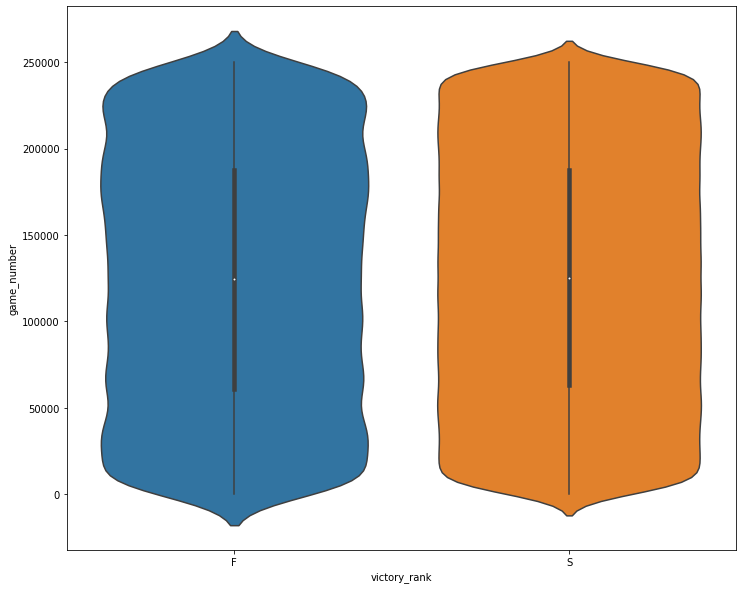

In [3]:
plt.figure(figsize=(12,10))
sns.violinplot(x='victory_rank', y='game_number', data=data)

<AxesSubplot:xlabel='survival_rank', ylabel='game_number'>

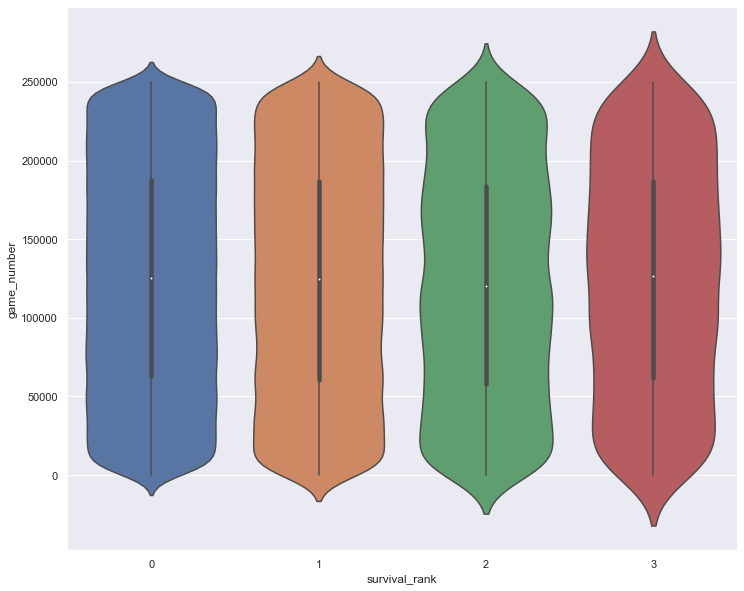

In [16]:
plt.figure(figsize=(12,10))
sns.violinplot(x='survival_rank', y='game_number', data=data)

In [7]:
data['survival_rank'].value_counts()

0    186423
1     54097
2      7554
3      1926
Name: survival_rank, dtype: int64

<AxesSubplot:xlabel='game_number', ylabel='tactic_rank'>

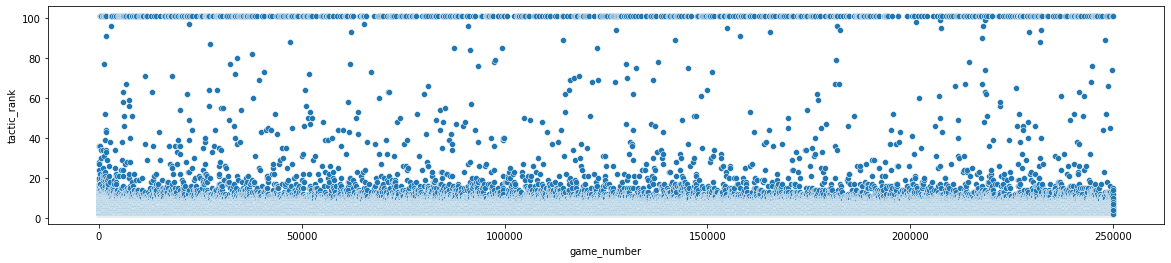

In [8]:
plt.figure(figsize=(20,4))
sns.scatterplot(x='game_number', y='tactic_rank', data=data)

In [9]:
data[["unit_1", "unit_2", "unit_3"]] = data["units"].str.split(pat="-", expand=True)
data.head(10)

,game_number,victory_rank,survival_rank,tactic_rank,units,unit_1,unit_2,unit_3
0,0,F,1,3,Dorcas-Florina-Lyn,Dorcas,Florina,Lyn
1,1,F,2,4,Canas-Matthew-Lyn,Canas,Matthew,Lyn
2,2,S,1,5,Canas-Bartre-Lyn,Canas,Bartre,Lyn
3,3,F,1,3,Guy-Raven-Lyn,Guy,Raven,Lyn
4,4,S,0,8,Sain-Rath-Lyn,Sain,Rath,Lyn
5,5,S,2,8,Rath-Sain-Eliwood,Rath,Sain,Eliwood
6,6,S,0,9,Dorcas-Kent-Hector,Dorcas,Kent,Hector
7,7,F,2,4,Matthew-Rebecca-Eliwood,Matthew,Rebecca,Eliwood
8,8,S,0,19,Marcus-Dorcas-Eliwood,Marcus,Dorcas,Eliwood
9,9,F,2,4,Erk-Rebecca-Lyn,Erk,Rebecca,Lyn


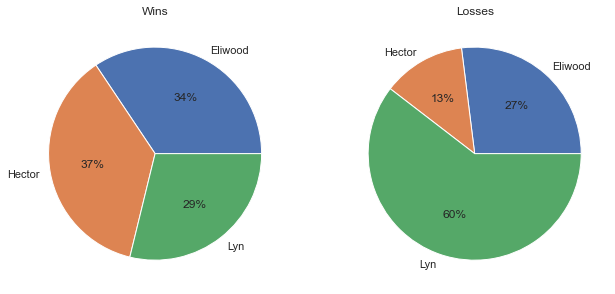

In [10]:
wins = data[data['victory_rank'] == 'S'].value_counts(subset='unit_3').sort_index()
losses = data[data['victory_rank'] == 'F'].value_counts(subset='unit_3').sort_index()

labels = ['Eliwood', 'Hector', 'Lyn']
sns.set_theme()

fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10.5, 5.5)
axs[0].pie(wins, labels=labels, autopct='%.0f%%')
axs[1].pie(losses, labels=labels, autopct='%.0f%%')
axs[0].title.set_text('Wins')
axs[1].title.set_text('Losses')
plt.show()

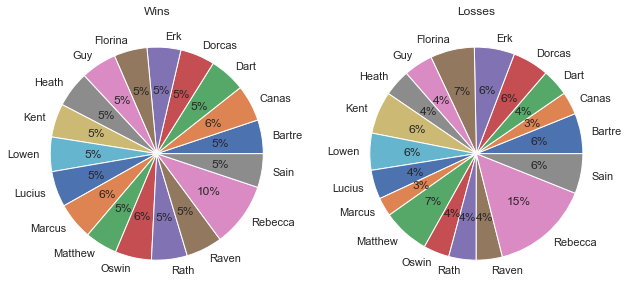

In [11]:
all_wins = data[data['victory_rank'] == 'S']
m_all_wins = pd.melt(all_wins, id_vars=['victory_rank'], value_vars=['unit_1', 'unit_2'])
all_losses = data[data['victory_rank'] == 'F']
m_all_losses = pd.melt(all_losses, id_vars=['victory_rank'], value_vars=['unit_1', 'unit_2'])

wins_count = m_all_wins.value_counts(subset='value').sort_index()
loss_count = m_all_losses.value_counts(subset='value').sort_index()

fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10.5, 5.5)
axs[0].pie(wins_count, labels=wins_count.index, autopct='%.0f%%')
axs[1].pie(loss_count, labels=loss_count.index, autopct='%.0f%%')
axs[0].title.set_text('Wins')
axs[1].title.set_text('Losses')
plt.show()